In [1]:
#Libs necessárias
import numpy as np
import pandas as pd

#para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [2]:
Basedados = pd.read_csv('Dados_incendio.csv', encoding='latin-1')

In [3]:
Basedados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [4]:
#Nulos, vendo quantos campos nulos existem
Basedados.isnull().sum()

,0
year,0
state,0
month,0
number,0
date,0


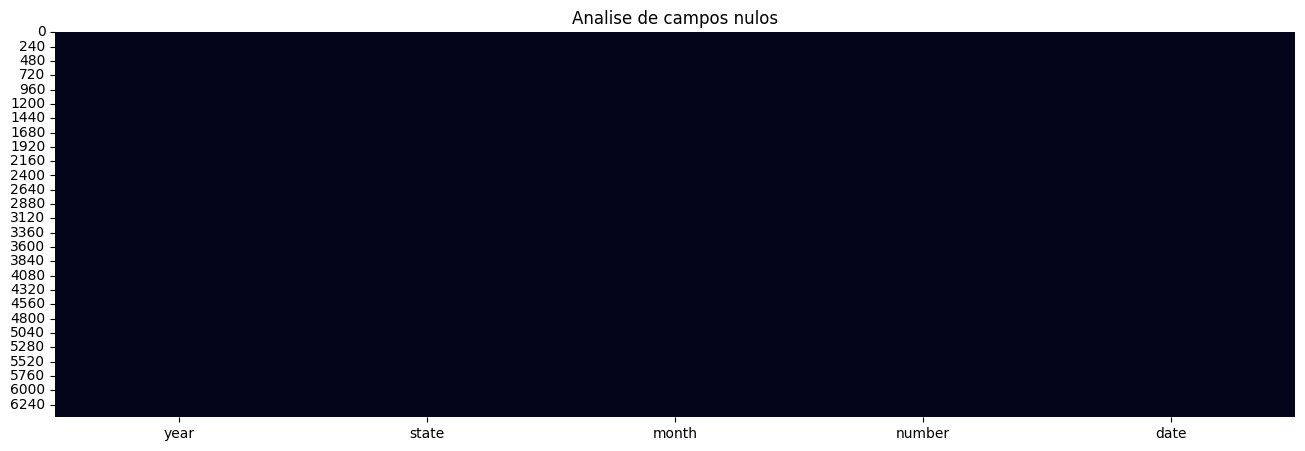

In [5]:
#Mapa de calor para os campos nulos

plt.figure(figsize=(16,5))
plt.title('Analise de campos nulos');
sns.heatmap(Basedados.isnull(), cbar=False);

In [6]:
#Estatísticas
Basedados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [7]:
#Verificar informações
Basedados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [8]:
#Verificar campos unicos

Basedados.nunique()

,0
year,20
state,23
month,12
number,1479
date,20


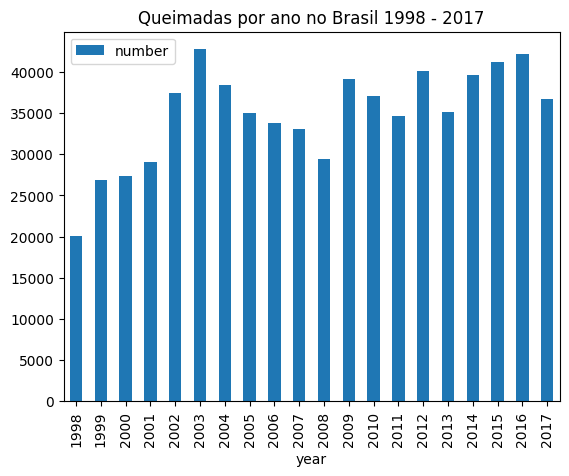

In [9]:
#Vendo numero de queimadas por ano
Grafico1 = Basedados.groupby( by=['year'] ).sum().reset_index().plot(kind='bar', x='year' ); #agupa pelo ano e faz um gráfico de barras
Grafico1.set_title('Queimadas por ano no Brasil 1998 - 2017');


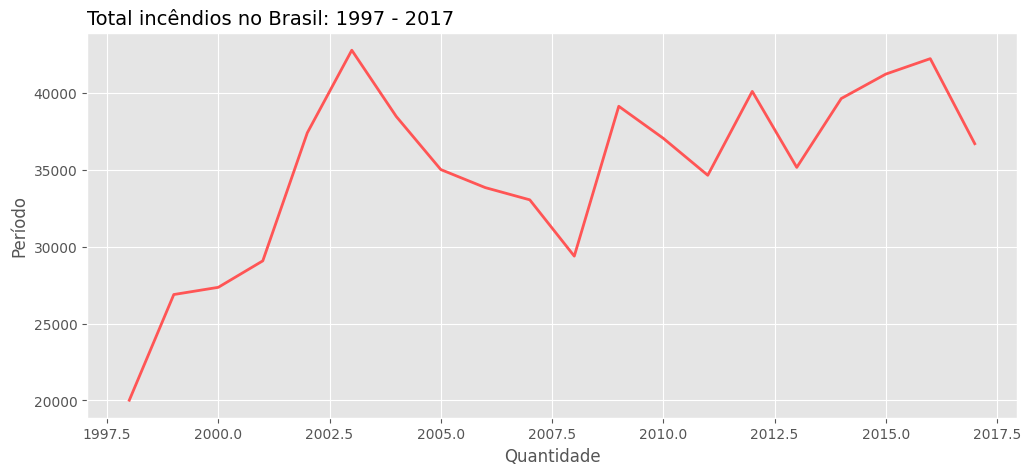

In [10]:
#Dessa vez com um gráfico de linha

Grafico2 = Basedados.groupby( by=['year'] ).sum().reset_index()

# Tamanho
plt.figure( figsize=(12, 5) )

# Style
plt.style.use('ggplot')

# Grafico
plt.title( 'Total incêndios no Brasil: 1997 - 2017', loc='left', fontsize=14 )
sns.lineplot( data=Grafico2, x='year', y='number', estimator='sum', lw=2, color='#ff5555', alpha=1 );

# Labels
plt.xlabel('Quantidade')
plt.ylabel('Período');

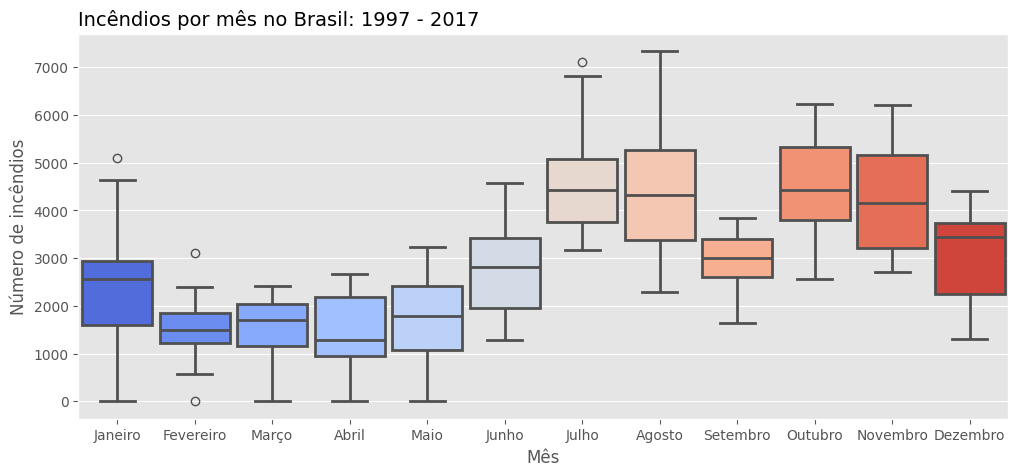

In [16]:
#Análise por meses dos incêndios

# Tamanho
plt.figure( figsize=(12, 5) );

plt.title( 'Incêndios por mês no Brasil: 1997 - 2017', loc='left', fontsize=14 )
Grafico3 = Basedados.groupby( by=['year', 'month'] ).sum().reset_index()
sns.boxplot( x='month', y='number', data=Grafico3,  palette='coolwarm', saturation=1, width=0.9, linewidth=2,
            order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'] )

# Labels
plt.xlabel('Mês')
plt.ylabel('Número de incêndios');

#Verificado que a maior frequência de incêndios é de agosto a Dezembro

In [12]:
#Vendo os estados com mais incêndios
Grafico4 = Basedados.groupby( by=['state']).sum().reset_index().sort_values( 'number', ascending=False )
#na linha acima, primeiro agrupou os dados por estado, depois se somou. Então resetou o index e deixou somente os dados state e number aparecerem. Após ordenou-se do maior para o menor pelo 'number'
Grafico4.head()

,state,number
10,Mato Grosso,96246.028
12,Paraiba,52435.918
20,Sao Paulo,51121.198
16,Rio,45160.865
4,Bahia,44746.226


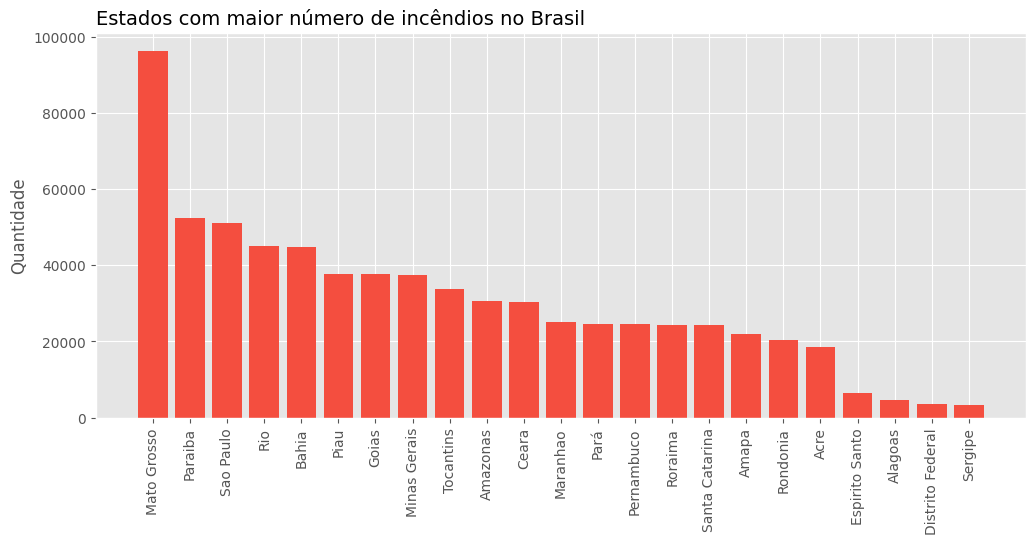

In [15]:
#Fazendo gráfico disso agora
plt.figure( figsize=(12, 5) )
plt.title('Estados com maior número de incêndios no Brasil', loc='left', fontsize=14)
plt.bar(Grafico4.state, Grafico4.number, color='#f44e3f')
plt.ylabel('Quantidade')
plt.xticks(rotation=90); #para os nomes ficarem na vertical, facilitando a leitura

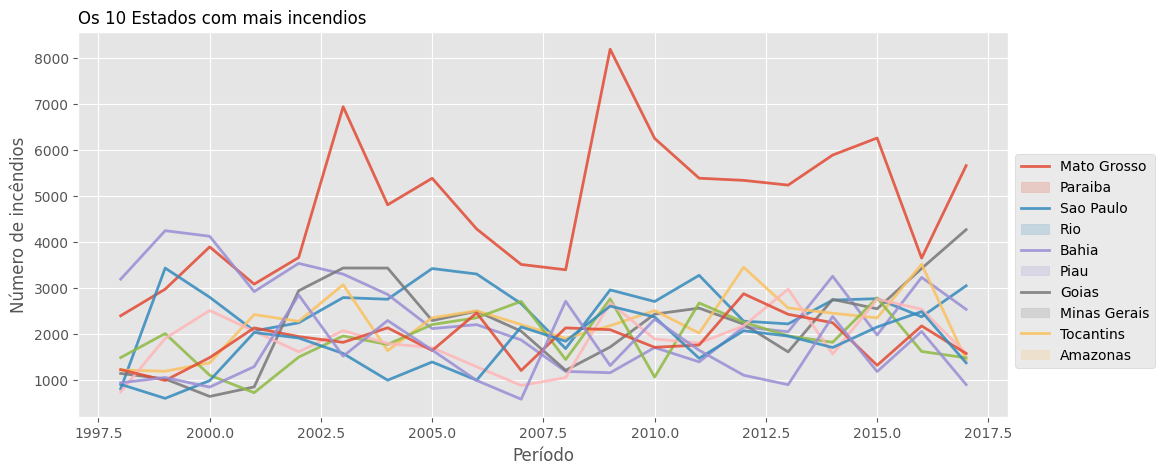

In [31]:
#Vendo um gráfico de evolução dos incendios por estado

Top10 = Grafico4['state'][0:10].values #pegando os 10 maiores estados

plt.figure( figsize=(12, 5) )
plt.title('Os 10 Estados com mais incendios', loc='left', fontsize=12)

#Agrupando todos os dados por estado, pegando todos os anos, mes por mes, mas sem somar
for Coluna in Top10:
  Filtro = Basedados.loc[Basedados['state'] == Coluna]

#somando todos os focos por ano em cada estado
  Analise_local = Filtro.groupby( by=['year'] ).sum().reset_index()
  #graficos
  sns.lineplot( data=Analise_local, x='year', y='number', lw=2, alpha=0.85);
  plt.xlabel('Período')
  plt.ylabel('Número de incêndios')

# Legenda
  plt.legend( Top10, bbox_to_anchor=(1, 0.7) );




In [35]:
# Plot Geográfico

# Gerando os estados
Estados = Grafico4.sort_values('state')['state'].values

# Gerando os valores
Valores = Grafico4.sort_values('state')['number'].values

# Latitudes
Lat = [ -8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]

# Longitudes
Log = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]

# Organizados os dados
Dicionario = {
    'Estados' : Estados,
    'Latitude' : Lat,
    'Longitude' : Log,
    'Incêndios' : Valores
}

# Lendo o dicionario
Analise_Geografica = pd.DataFrame ( Dicionario )

Analise_Geografica.head()

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


In [36]:
# Fazendo o plot
import plotly.express as px

# Mapa de CAlor Geografico
px.density_mapbox(
    Analise_Geografica,
    lat='Latitude',
    lon='Longitude',
    z='Incêndios',
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=3,
    mapbox_style='stamen-terrain'
)